# Intoduction to SCikit Learn:

### What are we going to cover in this notebook?
0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline


# An end-to-end Scikit learn workflow:

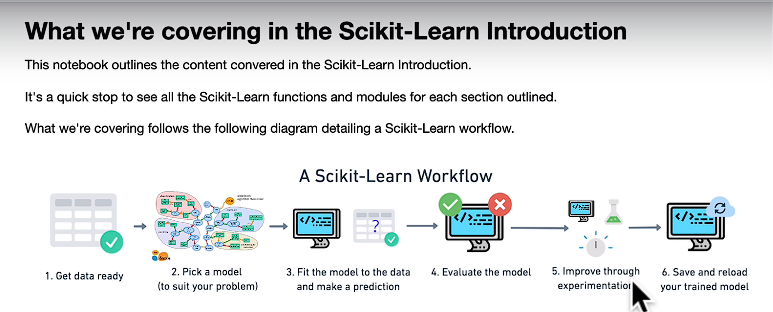

# 0. Standard Library imports:

In [8]:
import numpy as np

In [1]:
import pandas as pd
heart_disease_data = pd.read_csv("heart-disease.csv")
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X (Feature matrix)
X = heart_disease_data.drop("target", axis =1)

# Create y(labels)
y = heart_disease_data.target

In [4]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
clf.fit(X_train, y_train);

In [10]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
y_test

222    0
149    1
158    1
116    1
167    0
      ..
87     1
43     1
278    0
65     1
77     1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.7377049180327869

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        28
           1       0.71      0.88      0.78        33

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.75      0.74      0.73        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[16, 12],
       [ 4, 29]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.7377049180327869

In [20]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%")
    print("")
    

Trying model with 10 estimators..
Model accuracy on test set: 75.41%

Trying model with 20 estimators..
Model accuracy on test set: 78.69%

Trying model with 30 estimators..
Model accuracy on test set: 75.41%

Trying model with 40 estimators..
Model accuracy on test set: 73.77%

Trying model with 50 estimators..
Model accuracy on test set: 73.77%

Trying model with 60 estimators..
Model accuracy on test set: 75.41%

Trying model with 70 estimators..
Model accuracy on test set: 75.41%

Trying model with 80 estimators..
Model accuracy on test set: 73.77%

Trying model with 90 estimators..
Model accuracy on test set: 75.41%



In [22]:
# 6. Save a model and Load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [23]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.7540983606557377